In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv(r"C:\Users\praha\OneDrive\Desktop\Data Analyst Material\Project_Placement_Selection\placementdata.csv")
dataset.head()


,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [3]:
dataset = dataset.drop(columns=["StudentID","SSC_Marks","HSC_Marks"])
dataset.head()

dataset = pd.get_dummies(data=dataset,columns=["ExtracurricularActivities","PlacementTraining","PlacementStatus"],drop_first=True)

<Figure size 600x1000 with 0 Axes>

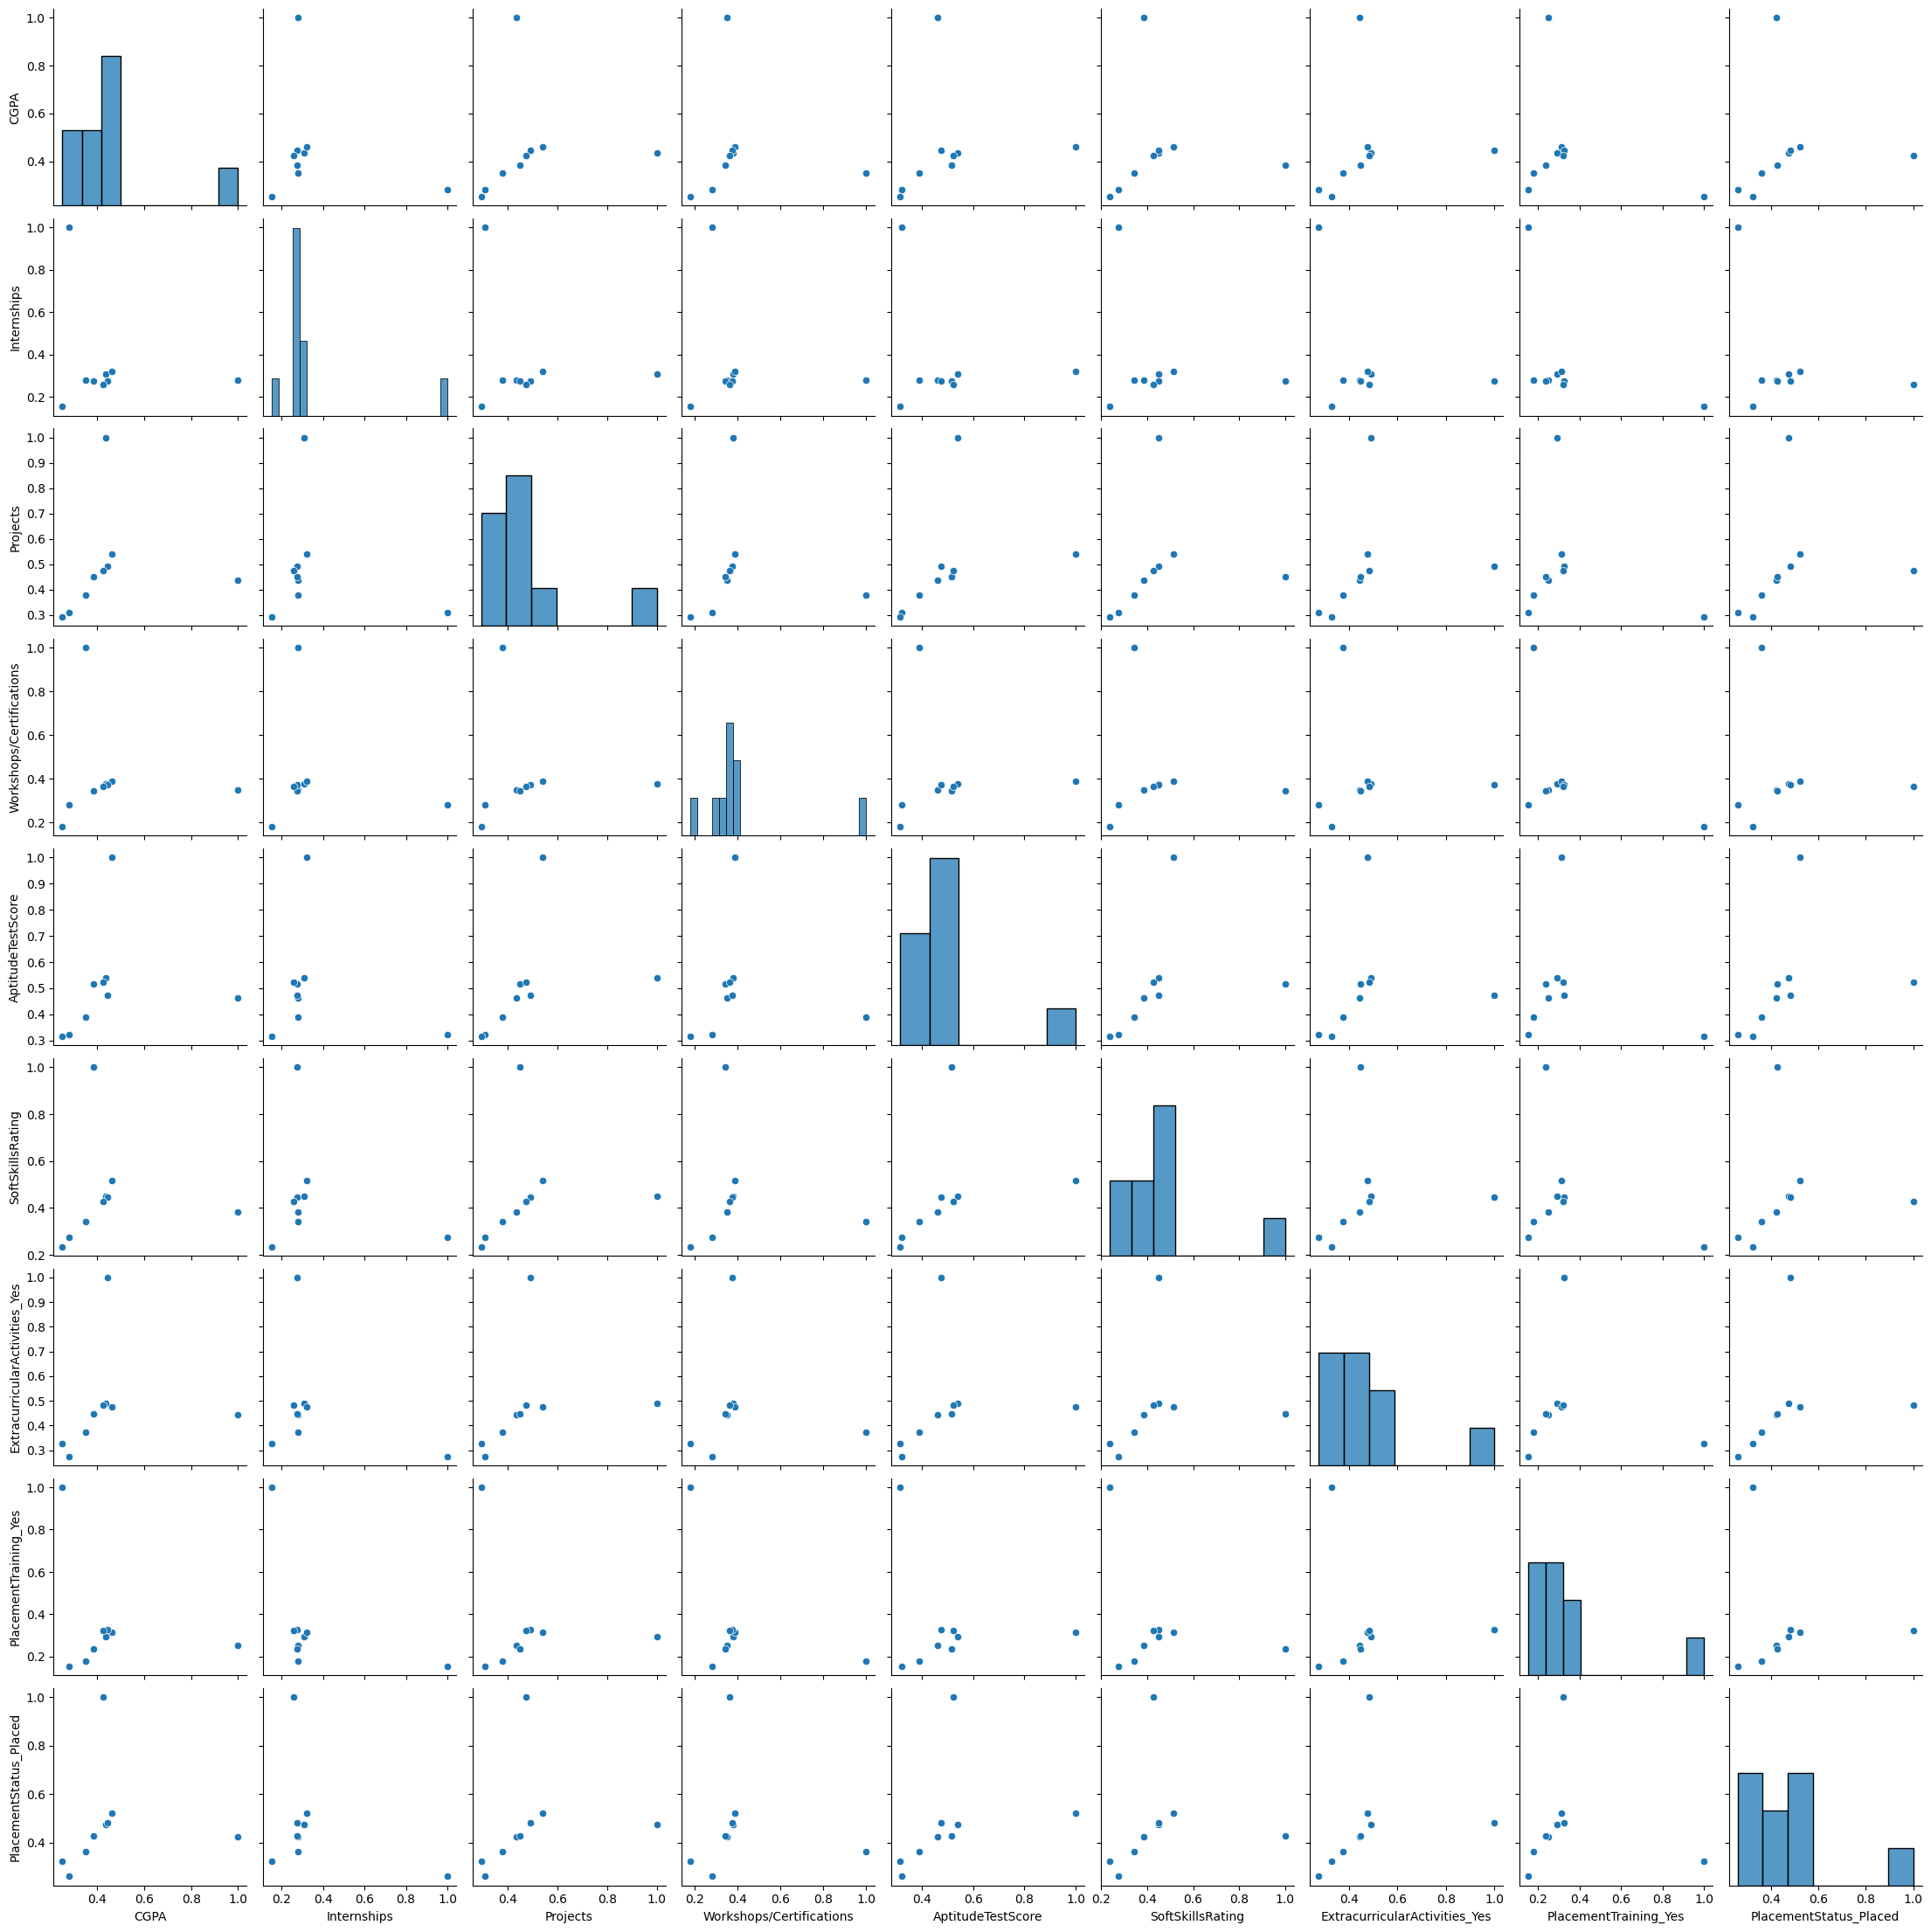

In [4]:
plt.figure(figsize=(6,10))
sns.pairplot(dataset.corr())
plt.show()



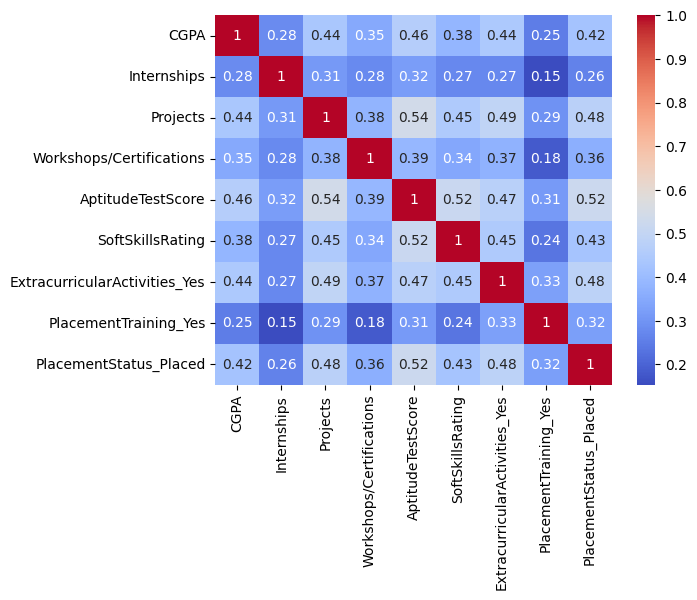

In [5]:
sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm")
plt.show()

In [6]:
dataset.head(10)

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities_Yes,PlacementTraining_Yes,PlacementStatus_Placed
0,7.5,1,1,1,65,4.4,False,False,False
1,8.9,0,3,2,90,4.0,True,True,True
2,7.3,1,2,2,82,4.8,True,False,False
3,7.5,1,1,2,85,4.4,True,True,True
4,8.3,1,2,2,86,4.5,True,True,True
5,7.0,0,2,2,71,4.2,True,False,False
6,7.7,1,1,1,76,4.0,False,False,False
7,7.7,2,1,0,85,3.5,True,True,False
8,6.5,1,1,0,84,3.9,False,True,False
9,7.8,1,3,2,79,4.4,True,True,True


In [7]:
from sklearn.preprocessing import StandardScaler
num_features = ["CGPA", "Internships", "Projects", "Workshops/Certifications", "AptitudeTestScore", "SoftSkillsRating"]
scaler = StandardScaler()
dataset[num_features] = scaler.fit_transform(dataset[num_features])  # Apply scaling only to numerical features


In [8]:
dataset.head()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities_Yes,PlacementTraining_Yes,PlacementStatus_Placed
0,-0.309343,-0.073889,-1.182822,-0.014598,-1.770910,0.184742,False,False,False
1,1.877818,-1.575689,1.121526,1.091319,1.292970,-0.787072,True,True,True
2,-0.621794,-0.073889,-0.030648,1.091319,0.312528,1.156555,True,False,False
3,-0.309343,-0.073889,-1.182822,1.091319,0.680194,0.184742,True,True,True
4,0.940464,-0.073889,-0.030648,1.091319,0.802749,0.427695,True,True,True


In [9]:
x=dataset.iloc[:,:8]
y=dataset["PlacementStatus_Placed"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=45)

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)


LogisticRegression()

In [10]:
lr.score(x_test,y_test)*100

80.05

In [33]:

y_pred = lr.predict(x_test)
dataset_com=pd.DataFrame({"Actual":y_test,"Predic":y_pred})

In [34]:
dataset_com.head(12)

,Actual,Predic
4132,False,True
6553,True,True
7604,True,True
585,False,False
5924,False,False
9642,False,False
2846,False,True
9751,False,False
1891,False,True
3367,True,True


In [35]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.84      0.82      0.83      1182
        True       0.75      0.77      0.76       818

    accuracy                           0.80      2000
   macro avg       0.79      0.80      0.79      2000
weighted avg       0.80      0.80      0.80      2000



In [38]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


In [40]:
lr = LogisticRegression(C=0.5, penalty='l2')
lr.fit(x_train, y_train)

LogisticRegression(C=0.5)

In [42]:
lr.score(x_test,y_test)*100

80.05

<Figure size 600x1000 with 0 Axes>

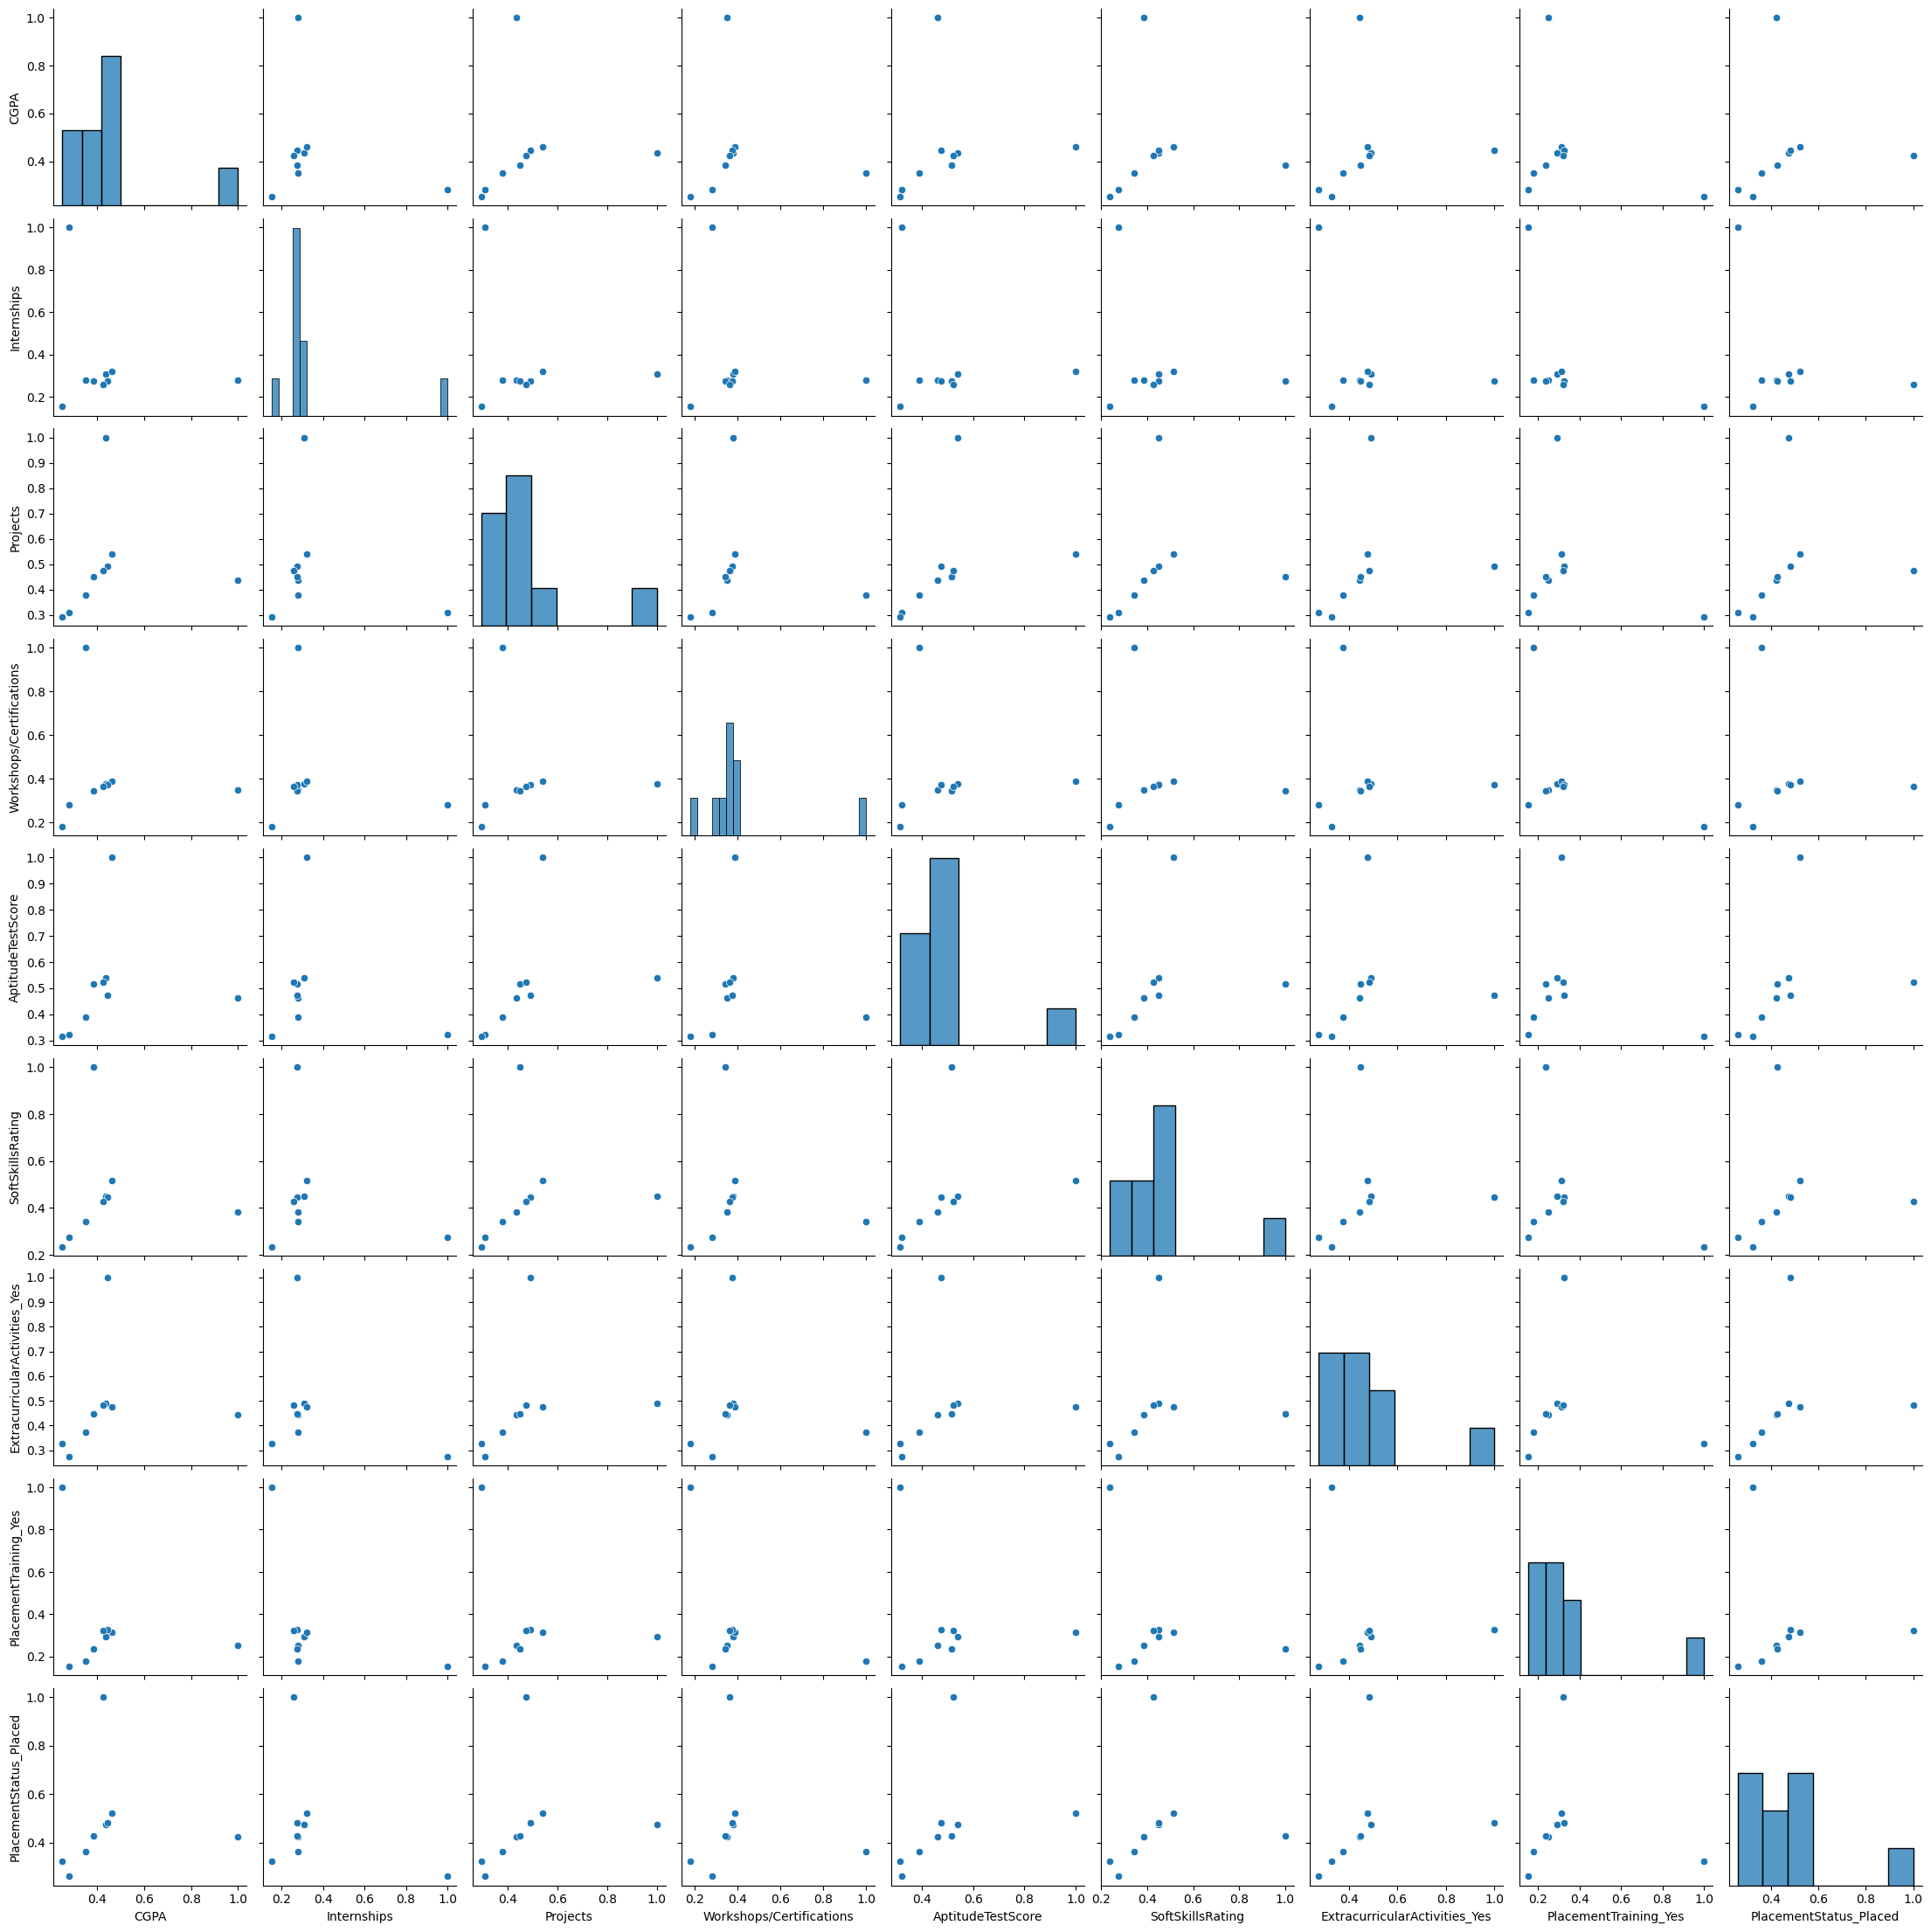

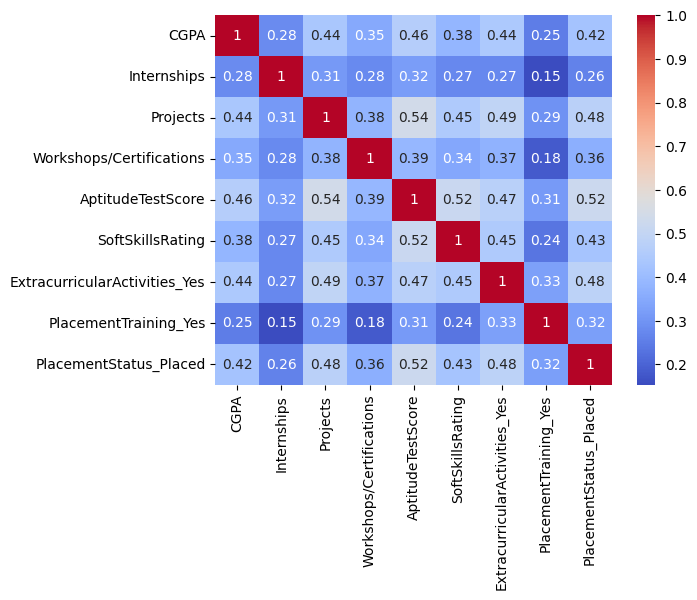

Model Accuracy: 78.70%
      Actual  Predicted
4132   False       True
6553    True       True
7604    True       True
585    False      False
5924   False      False


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

# Load Dataset
dataset = pd.read_csv(r"C:\Users\praha\OneDrive\Desktop\Data Analyst Material\Project_Placement_Selection\placementdata.csv")

# Drop unnecessary columns
dataset = dataset.drop(columns=["StudentID", "SSC_Marks", "HSC_Marks"])

# Convert categorical features into numerical
dataset = pd.get_dummies(data=dataset, columns=["ExtracurricularActivities", "PlacementTraining", "PlacementStatus"], drop_first=True)

# Visualization
plt.figure(figsize=(6,10))
sns.pairplot(dataset.corr())
plt.show()

sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm")
plt.show()

# Feature Scaling
num_features = ["CGPA", "Internships", "Projects", "Workshops/Certifications", "AptitudeTestScore", "SoftSkillsRating"]
scaler = StandardScaler()
dataset[num_features] = scaler.fit_transform(dataset[num_features])  

# Splitting Data
x = dataset.iloc[:, :8]
y = dataset["PlacementStatus_Placed"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=45)

# Apply SMOTE for balancing
smote = SMOTE()
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Train Logistic Regression with Hyperparameter tuning
lr = LogisticRegression(C=1.5, penalty='l2', solver='liblinear')
lr.fit(x_train_resampled, y_train_resampled)

# Accuracy Score
accuracy = lr.score(x_test, y_test) * 100
print(f"Model Accuracy: {accuracy:.2f}%")

# Predictions
y_pread = lr.predict(x_test)

# Compare actual vs predicted values
dataset_com = pd.DataFrame({"Actual": y_test, "Predicted": y_pread})
print(dataset_com.head())


In [44]:
print(f"Model Accuracy: {accuracy:.2f}%")


Model Accuracy: 78.70%


In [11]:
x=dataset.iloc[:,:8]
x

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities_Yes,PlacementTraining_Yes
0,-0.309343,-0.073889,-1.182822,-0.014598,-1.770910,0.184742,False,False
1,1.877818,-1.575689,1.121526,1.091319,1.292970,-0.787072,True,True
2,-0.621794,-0.073889,-0.030648,1.091319,0.312528,1.156555,True,False
3,-0.309343,-0.073889,-1.182822,1.091319,0.680194,0.184742,True,True
4,0.940464,-0.073889,-0.030648,1.091319,0.802749,0.427695,True,True
...,...,...,...,...,...,...,...,...
9995,-0.309343,-0.073889,-1.182822,1.091319,-0.913024,-1.030025,True,False
9996,-0.465568,-1.575689,-1.182822,-1.120516,1.292970,1.156555,False,False
9997,1.096689,-0.073889,1.121526,-1.120516,-1.158134,1.156555,True,True
9998,1.877818,-1.575689,1.121526,1.091319,0.925304,1.156555,True,True
